# Data Preprocessing

Data Preprocessing dibagi menjadi 4 bagian yaitu


*   Data exploration
*   Data Cleansing
*   Feature engineering 
*   Data splitting

1. Data explrorasi adalah menyimpulkan atau memahami data untuk menemukan sebuah ringkasan pada data tersebut.

2. Data cleansing suda kita kita pelajari pada tugas kemaren

3. Feature engineering yaitu mengubah bentuk data agar dapat lebih udah di proses dalam bahasa komputer, contohnya :

  *   Categorical Encoding
  *   Scalling
  *   binning

  (santuy ntar dijelasin satu-satu di bawah)

4. Lalu yang terakhir adalah Data splitting, seperti namanya yaitu membagi data, membagi data menjadi 3 bagian yaitu:

  *   Data Train
  *   Data Validasi
  *   Data test

Pada umumnya data dibagi menjadi:
  *   Data train 70% atau 80%
  *   Data validasi 20% atau 10%
  *   Data test 10%


Langsung aja skuy ngoding

In [0]:
# import library dulu cuy 
import pandas as pd
import math as mt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

In [0]:
df = pd.read_excel('WEEK1.xlsx')

In [4]:
df

,nama,nim,berat_badan,tinggi_badan,gender,asal
0,eric,100,50,189,female,Balikpapan
1,ihsan,101,53,176,male,Surabaya
2,agam,102,70,166,male,Pekanbaru
3,daus,103,71,176,female,Bandung
4,aurel,104,76,155,male,Depok
5,faiq,105,56,176,male,Balikpapan
6,azzam,106,67,176,male,Karawang
7,iqbal,107,80,175,female,Surabaya
8,imad,108,56,156,female,Pekanbaru


# Data exploration


*   Count the number of records
*   What are the datatypes
*   Look for missing values
*   Search for outliers
*   and others

In [5]:
# melihat dimensi pada dataframe
df.shape

(9, 6)

In [6]:
# melihat type pada dataframe
df.dtypes

nama            object
nim              int64
berat_badan      int64
tinggi_badan     int64
gender          object
asal            object
dtype: object

In [7]:
#untuk melihat, apakah terdapat missing values
df.isnull().values.any()

False

In [8]:
#untuk menghitung missing values
df.isnull().sum()

nama            0
nim             0
berat_badan     0
tinggi_badan    0
gender          0
asal            0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 15000x15000 with 0 Axes>

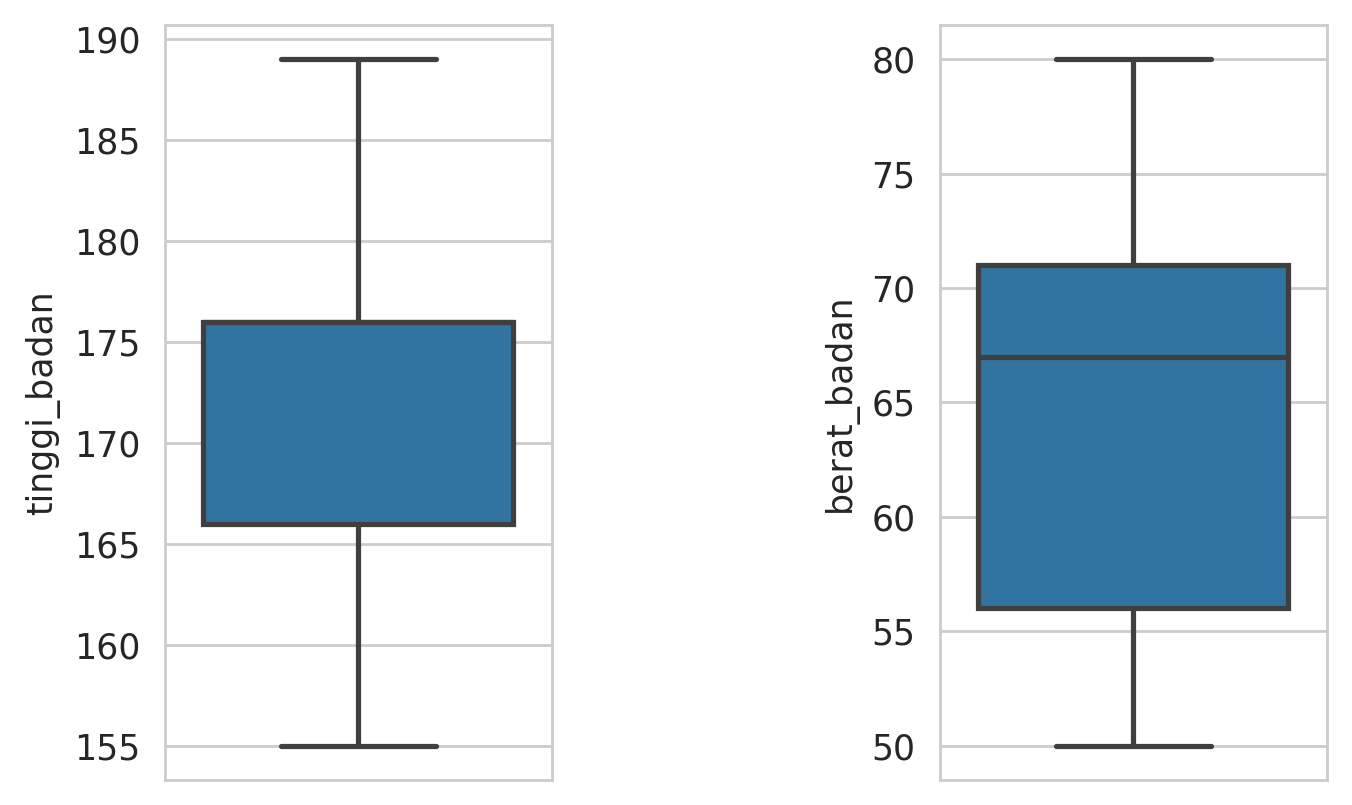

In [9]:
# melihat outliers , outliers adalah data yang anomali atau data yang jaraknya sangat jauh dari rata rata kelas
# untuk visualisasi data, akan di pelajari di minggu keempat

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 250
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["tinggi_badan"], ax=axes[0])
sns.boxplot(y=df["berat_badan"], ax=axes[1])
plt.subplots_adjust(wspace=1)

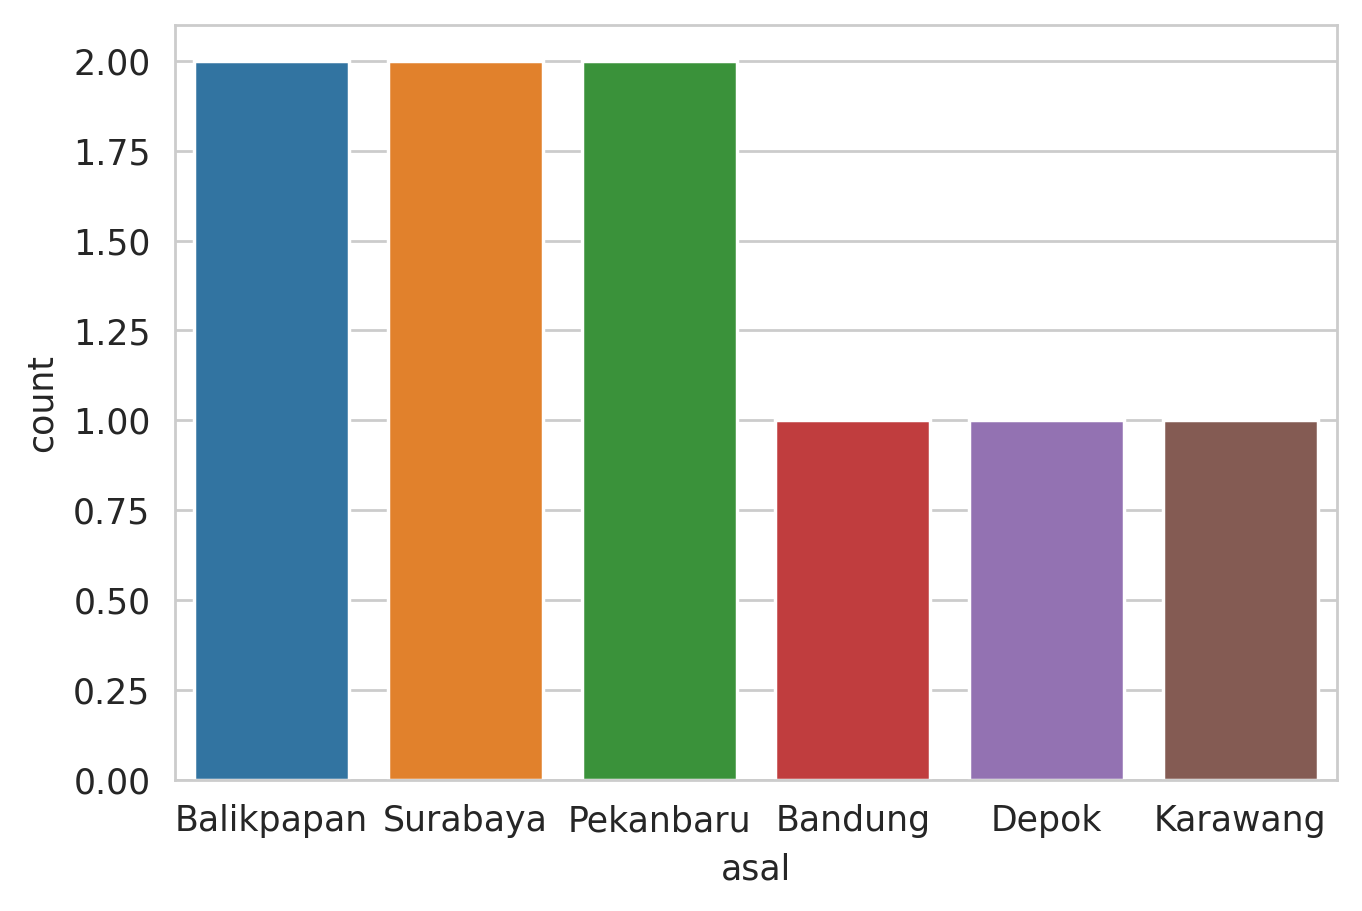

In [10]:
sns.countplot(x = 'asal', data = df)

# Data Cleansing
Udah kemaren brow, skip ae

# Feature engineering

untuk **categorical Encoding** biasanya dibagi menjadi dua tipe, yaitu ordinal dan non ordinal, contoh

Ordinal

 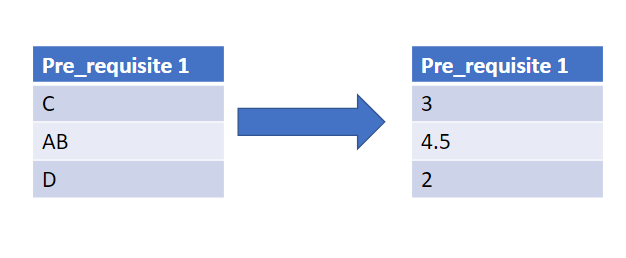

 Non-ordinal

 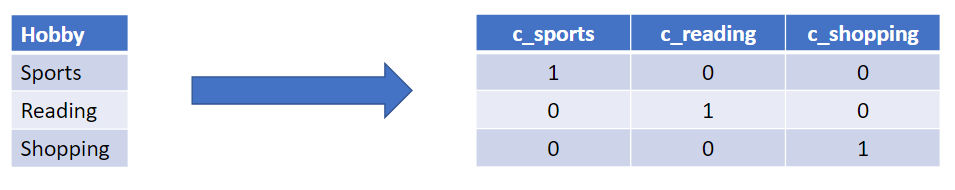

Scalling, yaitu mengubah data menjadi memiliki skala contoh:

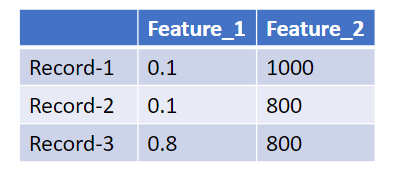


In [0]:
# contoh mengubah kolom 'gender' non-ordinal
df_train = df.replace(to_replace =("female","male"), 
                 value =(0,1)) 
x = df_train.iloc[:,:].values

In [12]:
# contoh mengubah kolom 'asal' non-ordinal, dengan one-hot encoder
labelencoder_x = LabelEncoder()
x[:,5] = labelencoder_x.fit_transform(x[:,5])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        
         OneHotEncoder(), 
         [5]              
         )
    ],
    remainder='passthrough'
)
x = transformer.fit_transform(x.tolist())

hasil = pd.DataFrame(x, columns = ['asal_Balikpapan', 'asal_Surabaya','asal_Pekanbaru', 'asal_Bandung', 'asal_Depok', 'asal_Karawang','nama','nim','berat_badan','tinggi_badan','gender'])
convert_dict = {'asal_Balikpapan':int,
                      'asal_Surabaya':int,
                      'asal_Pekanbaru':int,
                      'asal_Bandung':int,
                      'asal_Depok':int,
                      'asal_karawang':int
                      }
                  
print(hasil)

  asal_Balikpapan asal_Surabaya asal_Pekanbaru  ... berat_badan tinggi_badan gender
0               1             0              0  ...          50          189      0
1               0             0              0  ...          53          176      1
2               0             0              0  ...          70          166      1
3               0             1              0  ...          71          176      0
4               0             0              1  ...          76          155      1
5               1             0              0  ...          56          176      1
6               0             0              0  ...          67          176      1
7               0             0              0  ...          80          175      0
8               0             0              0  ...          56          156      0

[9 rows x 11 columns]


In [13]:
# contoh scalling, data tidak ada yang perlu discaling, sehingga kita buat conth baru

X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

# Data splitting

In [14]:
xtrain = df.iloc[:6]
xval = df.iloc[6:8]
xtest = df.iloc[-1:]
print(xtrain)

    nama  nim  berat_badan  tinggi_badan  gender        asal
0   eric  100           50           189  female  Balikpapan
1  ihsan  101           53           176    male    Surabaya
2   agam  102           70           166    male   Pekanbaru
3   daus  103           71           176  female     Bandung
4  aurel  104           76           155    male       Depok
5   faiq  105           56           176    male  Balikpapan


In [15]:
xval

,nama,nim,berat_badan,tinggi_badan,gender,asal
6,azzam,106,67,176,male,Karawang
7,iqbal,107,80,175,female,Surabaya


In [16]:
df['asal'].value_counts()

Balikpapan    2
Surabaya      2
Pekanbaru     2
Bandung       1
Depok         1
Karawang      1
Name: asal, dtype: int64

# TAMBAHAN
untuk beberapa hal dalam "FEATURE SCALLING" dalam sebuah kasus tidak perlu dilakukan semuanya, mungkin hanya beberapa saja tergantung **METODE** yang dipakai, untuk minggu depan akan kita akan mempelajari **Unsupervised Learning**